<h1>0. Importación de librerías</h1>

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras import models
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import joblib
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer

<h1>1. Carga y exploración inicial del dataset</h1>

In [55]:
df = pd.read_csv("heart.csv")

In [56]:
print(df.shape)
df.head()

(1015, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1015 non-null   int64  
 1   sex       1015 non-null   int64  
 2   cp        1015 non-null   int64  
 3   trestbps  1015 non-null   int64  
 4   chol      1015 non-null   int64  
 5   fbs       1015 non-null   int64  
 6   restecg   1015 non-null   int64  
 7   thalach   1015 non-null   int64  
 8   exang     1015 non-null   int64  
 9   oldpeak   1015 non-null   float64
 10  slope     1015 non-null   int64  
 11  ca        1015 non-null   int64  
 12  thal      1015 non-null   int64  
 13  target    1015 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 111.1 KB


In [58]:
# Columnas categóricas y numéricas
cat_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Categorical columns:", cat_cols)
print("Numerical columns:", num_cols)

Categorical columns: []
Numerical columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1015 non-null   int64  
 1   sex       1015 non-null   int64  
 2   cp        1015 non-null   int64  
 3   trestbps  1015 non-null   int64  
 4   chol      1015 non-null   int64  
 5   fbs       1015 non-null   int64  
 6   restecg   1015 non-null   int64  
 7   thalach   1015 non-null   int64  
 8   exang     1015 non-null   int64  
 9   oldpeak   1015 non-null   float64
 10  slope     1015 non-null   int64  
 11  ca        1015 non-null   int64  
 12  thal      1015 non-null   int64  
 13  target    1015 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 111.1 KB


In [60]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000
mean,54.444335,0.693596,0.947783,131.710345,246.106404,0.149754,0.531034,149.207882,0.334975,1.071330,1.385222,0.752709,2.322167,0.515271
std,9.090418,0.461227,1.029272,17.541915,51.695975,0.357006,0.528080,22.976429,0.472215,1.176762,0.618883,1.031520,0.621485,0.500013
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [61]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Categorical columns:", cat_cols)
print("Numerical columns:", num_cols)

Categorical columns: []
Numerical columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [62]:
df['sex'] = df['sex'].astype("category")

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1015 non-null   int64   
 1   sex       1015 non-null   category
 2   cp        1015 non-null   int64   
 3   trestbps  1015 non-null   int64   
 4   chol      1015 non-null   int64   
 5   fbs       1015 non-null   int64   
 6   restecg   1015 non-null   int64   
 7   thalach   1015 non-null   int64   
 8   exang     1015 non-null   int64   
 9   oldpeak   1015 non-null   float64 
 10  slope     1015 non-null   int64   
 11  ca        1015 non-null   int64   
 12  thal      1015 non-null   int64   
 13  target    1015 non-null   int64   
dtypes: category(1), float64(1), int64(12)
memory usage: 104.3 KB


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>,
        <Axes: title={'center': 'chol'}>],
       [<Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>,
        <Axes: title={'center': 'exang'}>],
       [<Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>, <Axes: title={'center': 'thal'}>],
       [<Axes: title={'center': 'target'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

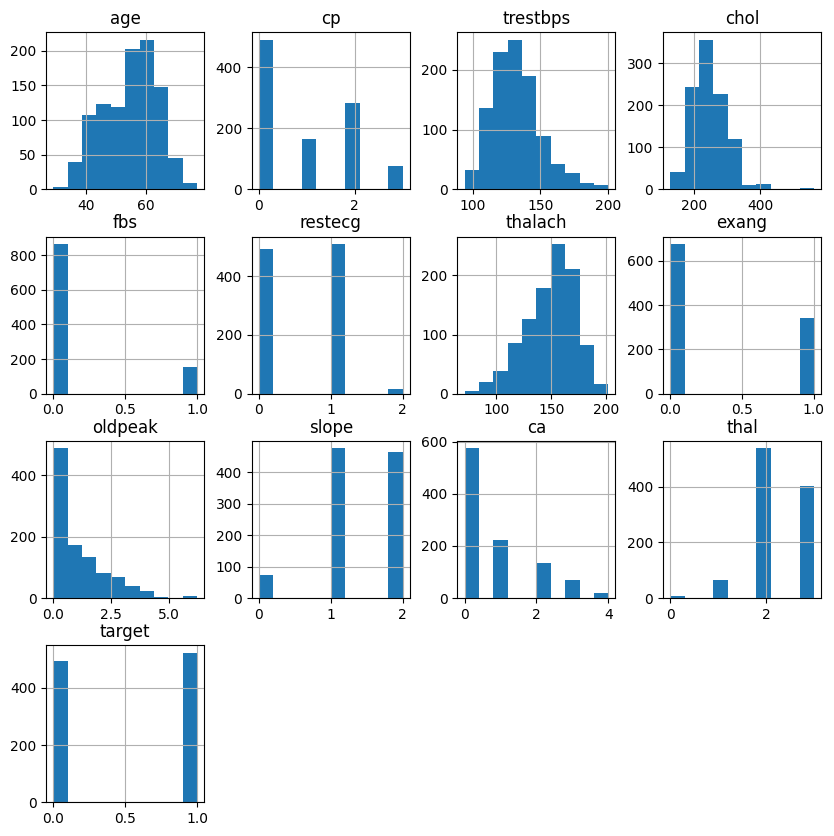

In [64]:
df[num_cols].hist(figsize = (10, 10))

In [65]:
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

In [66]:
train_set, val_set, test_set = train_val_test_split(df)

In [67]:
print("Length of the Training Set:", len(train_set))
print("Length of the Validation Set:", len(val_set))
print("Length of Test Set:", len(test_set))

Length of the Training Set: 609
Length of the Validation Set: 203
Length of Test Set: 203


In [68]:
X_train = train_set.drop("target", axis=1)
y_train = train_set["target"].copy()

In [69]:
train_set.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
665,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
185,57,1,0,165,289,1,0,124,0,1.0,1,3,3,0
41,54,1,2,120,258,0,0,147,0,0.4,1,0,3,1
620,57,1,0,152,274,0,1,88,1,1.2,1,1,3,0
108,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0


### Transformers for empty values



### Transformers for numerical attributes

In [71]:
class CustomImputer(BaseEstimator, TransformerMixin):
    def __init__(self, strategy='median'):
        self.strategy = strategy
        self.imputer = None

    def fit(self, X, y=None):
        self.imputer = SimpleImputer(strategy=self.strategy)
        self.imputer.fit(X)
        return self

    def transform(self, X):
        return pd.DataFrame(self.imputer.transform(X), columns=X.columns, index=X.index)


class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self, do=True):
        self.do = do
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        if not self.do:
            return X
        X_copy = X.copy()
        num_cols = X_copy.select_dtypes(include=['int64', 'float64']).columns
        for col in num_cols:
            Q1 = X_copy[col].quantile(0.25)
            Q3 = X_copy[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            X_copy = X_copy[(X_copy[col] >= lower) & (X_copy[col] <= upper)]
        return X_copy

### Transformers for categorical attributes

In [81]:
# Limpieza previa
cleaner = Pipeline([
    ('remove_outliers', OutlierRemover(do=False))
])

X_train_clean = cleaner.fit_transform(X_train, y_train)
y_train_clean = y_train.loc[X_train_clean.index]


In [73]:
class CustomEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, method='onehot'):
        self.method = method
        self.encoder = None
        self.columns = None

    def fit(self, X, y=None):
        self.columns = X.columns
        if self.method == 'onehot':
            self.encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
        elif self.method == 'ordinal':
            self.encoder = OrdinalEncoder()
        else:
            raise ValueError("Encoder no reconocido")
        self.encoder.fit(X)
        return self

    def transform(self, X):
        X_enc = self.encoder.transform(X)
        if self.method == 'onehot':
            cols = []
            for i, col in enumerate(X.columns):
                if hasattr(self.encoder, 'categories_'):
                    cats = self.encoder.categories_[i]
                    cols.extend([f"{col}_{c}" for c in cats])
            return pd.DataFrame(X_enc, columns=cols, index=X.index)
        else:
            return pd.DataFrame(X_enc, columns=X.columns, index=X.index)

### Building Custom Pipelines

In [74]:
num_cols = X_train.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object','category']).columns.tolist()

num_pipeline = Pipeline([
    ('imputer', CustomImputer(strategy='median')),
    ('scaler', RobustScaler())
])
cat_pipeline = Pipeline([
    ('imputer', CustomImputer(strategy='most_frequent')),
    ('encoder', CustomEncoder(method='ordinal'))
])

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])


## In case we don't need the model in our pipeline

In [75]:
#clf_pipeline = Pipeline([
#            ("delete_nans", DeleteNanRows()),
#            ("outlier_remover", OutlierRemover(do=True)),
#            ("preprocessor", full_pipeline)
#        ])

In [76]:
#clf_pipeline.fit(X_train, y_train)

In [84]:

full_pipeline.fit(X_train_clean)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', CustomImputer()),
                                                 ('scaler', RobustScaler())]),
                                 ['age', 'cp', 'trestbps', 'chol', 'fbs',
                                  'restecg', 'thalach', 'exang', 'oldpeak',
                                  'slope', 'ca', 'thal']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  CustomImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  CustomEncoder(method='ordinal'))]),
                                 ['sex'])])

In [77]:
#joblib.dump(clf_pipeline, "preprocessing.pkl")

### Using our model

In [82]:
clf_pipeline = Pipeline([
    ("preprocessor", full_pipeline),
    ("classifier", DecisionTreeClassifier(random_state=42, max_depth=20, min_samples_split=5, min_samples_leaf=3))])

X_val = val_set.drop("target", axis=1)
y_val = val_set["target"]
X_test = test_set.drop("target", axis=1)
y_test = test_set["target"]

clf_pipeline.fit(X_train_clean, y_train_clean)

print("Train:")
print(classification_report(y_train, clf_pipeline.predict(X_train)))
print("Val:")
print(classification_report(y_val, clf_pipeline.predict(X_val)))
print("Test:")
print(classification_report(y_test, clf_pipeline.predict(X_test)))

joblib.dump(clf_pipeline, "decision_tree_pipeline.pkl")

Train:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       284
           1       0.99      0.96      0.97       325

    accuracy                           0.97       609
   macro avg       0.97      0.97      0.97       609
weighted avg       0.97      0.97      0.97       609

Val:
              precision    recall  f1-score   support

           0       0.86      0.95      0.91       101
           1       0.95      0.85      0.90       102

    accuracy                           0.90       203
   macro avg       0.91      0.90      0.90       203
weighted avg       0.91      0.90      0.90       203

Test:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       107
           1       0.94      0.85      0.90        96

    accuracy                           0.91       203
   macro avg       0.91      0.90      0.91       203
weighted avg       0.91      0.91      0.91       203



/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


['decision_tree_pipeline.pkl']